In [2]:
#importing the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score


In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.1


In [4]:
# Importing the dataset
df =  pd.read_csv("AML.csv")
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#Removing the unwanted features / too many unique values
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
#Checking for any null values
print('Null Values =',df.isnull().values.any())

Null Values = False


<AxesSubplot:title={'center':'Correlation Matrix'}>

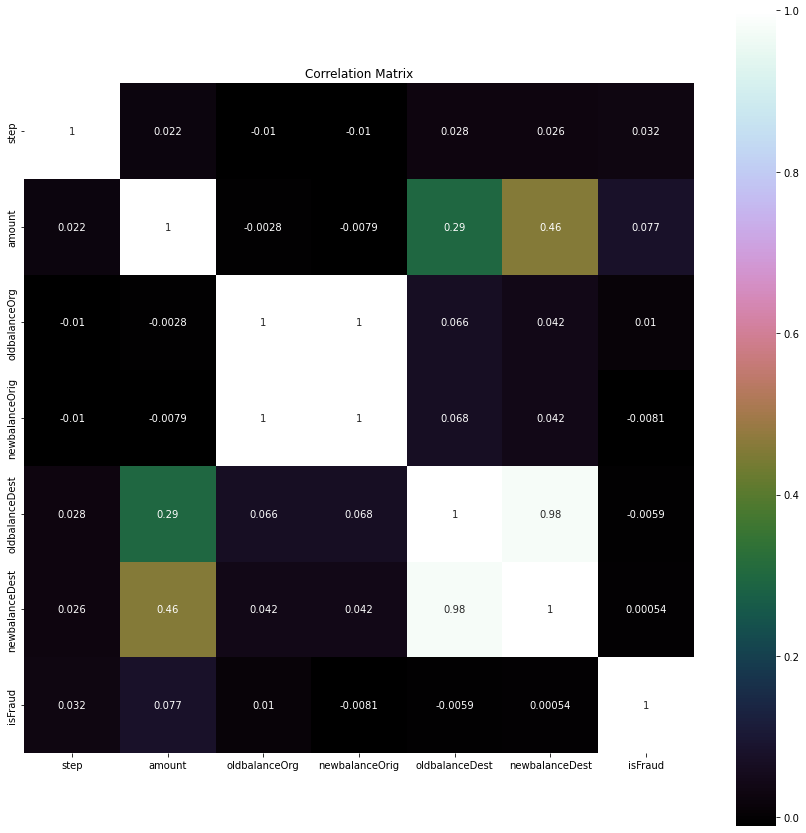

In [10]:
# co-relation matrix to check multicolinearity between variables 

correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [11]:
#creating dummy variables for categorical values
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)

In [12]:
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


0    19981
1       19
Name: isFraud, dtype: int64
Before OverSampling, counts of label '1': 14
Before OverSampling, counts of label '0': 13986 

After OverSampling, the shape of train_X: (27972, 11)
After OverSampling, the shape of train_y: (27972,) 

After OverSampling, counts of label '1': 13986
After OverSampling, counts of label '0': 13986


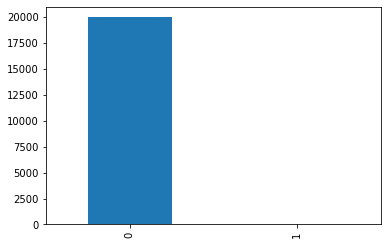

In [13]:
#checking if target class is balanced or not

#Return a random sample of items from an axis of object.
df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

#Splitting the data into training and test

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

#resampling the training data

#SMOTE is a type of data augmentation that synthesizes new samples from the existing ones. 
#SMOTE actually creates new samples by  duplication of the minority class. 
sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [14]:
### Feature scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)
x_train_scaled.shape

(27972, 11)

In [27]:

#Initializing the model 

model = Sequential()

#Adding the input layer and the first hidden layer 

model.add(Dense(6,kernel_initializer='glorot_uniform',  activation = 'relu',input_dim=11))

#Adding the second hidden layer 

model.add(Dense( 6, kernel_initializer='glorot_uniform' ,activation = 'relu'))

#Adding the output layer 

model.add(Dense(1, activation = 'sigmoid'))

#Compiling and fitting the model 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history  = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 10)

#Plotting the training curves 



Epoch 1/10
2798/2798 [==============================] - 2s 756us/step - loss: 0.2141 - accuracy: 0.91600s - loss: 0.2308 - accu
Epoch 2/10
2798/2798 [==============================] - 2s 649us/step - loss: 0.0795 - accuracy: 0.9725
Epoch 3/10
2798/2798 [==============================] - 2s 646us/step - loss: 0.0553 - accuracy: 0.9838
Epoch 4/10
2798/2798 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9872 ETA:  - ETA: 0s - loss: 0.0457 -  - 2s 649us/step - loss: 0.0442 - accuracy: 0.9872
Epoch 5/10
2798/2798 [==============================] - 2s 645us/step - loss: 0.0369 - accuracy: 0.98901s - loss: 0.0424  - ETA: 0s - loss: 0.0388  - ETA: 0s - loss: 0.0364 - accuracy: 
Epoch 6/10
2798/2798 [==============================] - 2s 645us/step - loss: 0.0292 - accuracy: 0.99100s - loss: 0.0288 
Epoch 7/10
2798/2798 [==============================] - 2s 667us/step - loss: 0.0251 - accuracy: 0.9925
Epoch 8/10
2798/2798 [==============================] - 2s 639us/step 

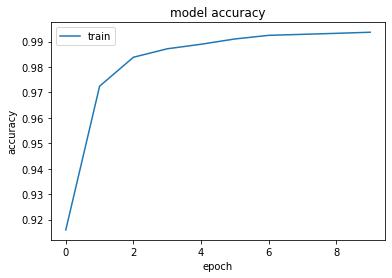

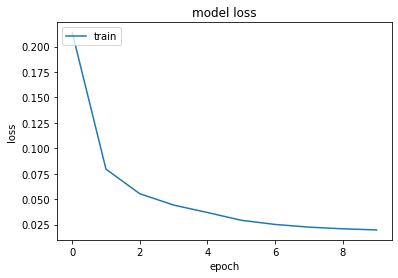

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.save("anti-money-laundering.h5")

In [30]:
rnd_columns=X_train.columns


In [31]:
model

In [33]:
#Serialize the model and save
#Load the model
import joblib
import keras
lr = keras.models.load_model('anti-money-laundering.h5')
print("crd Model  Saved")
# Save features from training
rnd_columns = list(rnd_columns)
joblib.dump(rnd_columns, 'aml_columns.pkl')
print("crd Model Colums Saved")

crd Model  Saved
crd Model Colums Saved
